# ReCell Project_Supervised Learning

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

In [ ]:
import warnings

warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [2]:
# loading the dataset
data = pd.read_csv("used_device_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

<IPython.core.display.Javascript object>

In [4]:
df.shape

(3454, 15)

<IPython.core.display.Javascript object>

**Observation:** The dataset has 15 columns and 3454 rows

In [5]:
# Checking the first five fows of the datasetb
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64


<IPython.core.display.Javascript object>

In [6]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


<IPython.core.display.Javascript object>

**Observations:**
* The columns `brand_name` and `os` have a object data type since the values are names/strings.
* Columns `4g` and `5g` are also object type because they should have two possible values: *yes or no*.
* The columns with a float64 data type are: `screen_size`, `main_camera_mp`, `selfie_camera_mp`, `int_memory`, `ram`, `battery`, `weight`, `new_price` and `use_price`. This makes sense because they are all numeric columns.
* The columns `release_year` and `days_used` are int64 since they are numerical columns without decimals.
* For most of the columns (but not all) the number of non-null values matches the number of total rows, therefore there are no missing values.

In [7]:
# checking for missing values in the data.
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

**Observations:** There are some columns with missing values, we'll decide how to treat them when preprocesing the data. There are no missing values in our target variable `used_price`. 

In [8]:
# checking for duplicate values in the data
print(f"There are {df.duplicated().sum()} duplicated values in the dataset")

There are 0 duplicated values in the dataset


<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

**Questions**:

1. What does the distribution of used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the price of a used device?

In [9]:
# Checking the statistical summary of the data, including non-numerical values
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


<IPython.core.display.Javascript object>

**Observations:**
* The column `brand_name` has 34 unique values. The cost frequent is 'Others'.
* The operating system with more entries is 'Android', with 3214 out of 3454 entries.
* The screen size of the devices varies from a minimum of ~5cm to a max of ~30cm.
* Most of the devices have 4g but not 5g.
* The avarage median camera megapixeles is 8. The median selfie camera megapixeles is 5.
* The internal memory varies a lot, froma minimum of 0.01 GB to a max of 1024 GB.
* The median battery has an energy capacity of 3000 mAh.
* The weight of the devices goes from 69 grams to 855 grams.
* Devices on the dataset are from the years 2013 to 2020.
* The device/s with less use have been used for 91 days. And there are no devices used more than ~3 years (1094 days)
* The avarage price of is 237 euros for new devices, and 92 euros for used devices


In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### 1. What does the distribution of used device prices look like?

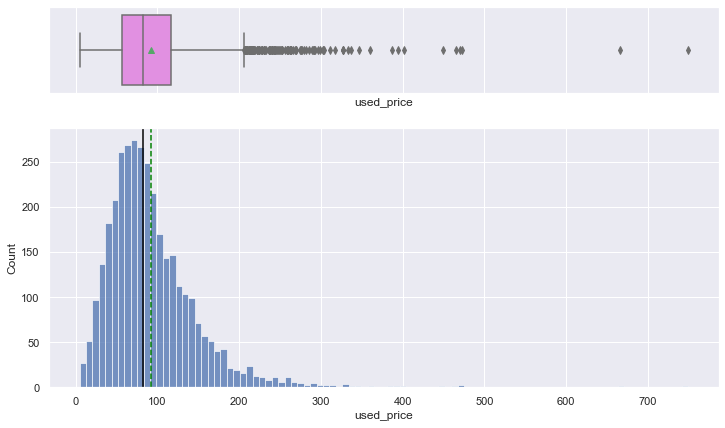

<IPython.core.display.Javascript object>

In [12]:
histogram_boxplot(df, "used_price")

**Observations:** 
* Although the mean and the median are not that far from eachother, the distribution of used device prices is right skewed. 
* There is only a 10 euros difference between the mean (~ €92.00) and the median (~ €82.00) price, but there are various outliers on the righ side of the distribution. 
* As the box plot shows, most of the outlier points are between €200 and €300. There are much less outliers, but still some, between €300 and €500. There are only a few of them in this range €600-€800, we cannot even see them in the histogram.

#### 2. What percentage of the used device market is dominated by Android devices?

In [13]:
df.os.value_counts(normalize=True)

Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: os, dtype: float64

<IPython.core.display.Javascript object>

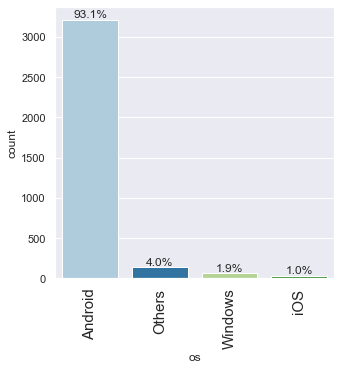

<IPython.core.display.Javascript object>

In [14]:
labeled_barplot(df, "os", perc=True)

**Observation:** Android represent 93% of the used devide market

#### 3.The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

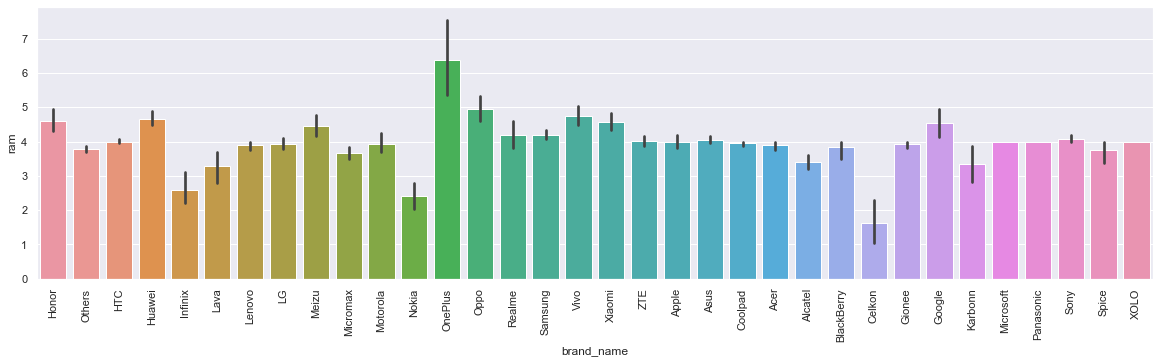

<IPython.core.display.Javascript object>

In [15]:
plt.figure(figsize=(20, 5))

sns.barplot(data=df, y="ram", x="brand_name")
plt.xticks(rotation=90)

plt.show()

In [16]:
df.groupby("brand_name")["ram"].describe()

,count,mean,std,min,25%,50%,75%,max
brand_name,,,,,,,,
Acer,51.0,3.901961,0.500196,1.00,4.00,4.00,4.0,4.0
Alcatel,121.0,3.407025,1.263730,0.25,4.00,4.00,4.0,4.0
Apple,39.0,4.000000,0.606977,2.00,4.00,4.00,4.0,6.0
Asus,122.0,4.049180,0.600997,2.00,4.00,4.00,4.0,8.0
BlackBerry,22.0,3.829545,0.799503,0.25,4.00,4.00,4.0,4.0
Celkon,33.0,1.613636,1.831891,0.25,0.25,0.25,4.0,4.0
Coolpad,22.0,3.954545,0.213201,3.00,4.00,4.00,4.0,4.0
Gionee,56.0,3.933036,0.501115,0.25,4.00,4.00,4.0,4.0
Google,15.0,4.533333,0.915475,4.00,4.00,4.00,5.0,6.0


<IPython.core.display.Javascript object>

**Observations:** The brand Celkon has the lowest avarage RAM memory (~ 1.61), and the brand OnePlus has the highest (~ 6.36). OnePlus is the only brand with a median of 6 GB, most of the other brands have a median RAM memory of 4 GB.

#### 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?


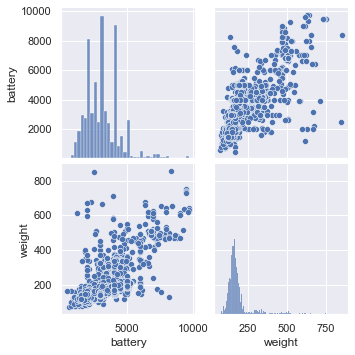

<IPython.core.display.Javascript object>

In [17]:
sns.pairplot(df[["battery", "weight"]])

**Observations:** As it is mention in the question, we can see a positive correlation between the weight and battery size of the devices. 

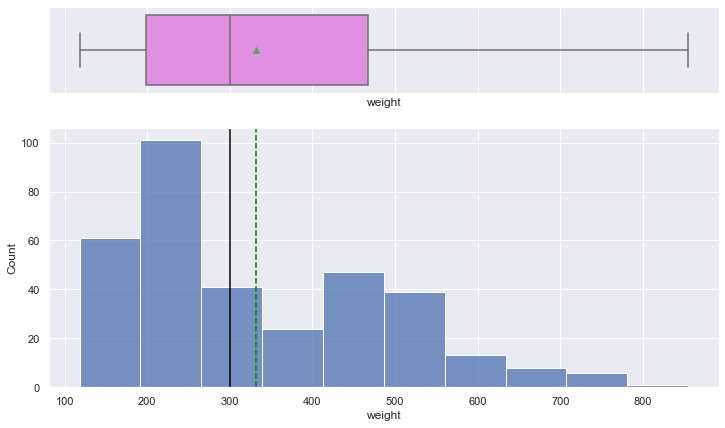

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df.loc[df.battery > 4500], "weight")

**Observations:** If we analyze only the devices with a battery bigger than 4500 mAh, there are 100 devices which weight is between 200 and 300 grams (100 devices-the mode value). The avarage weight is about 340 and the mean 300. There are also may heavier devices that weight between about 450 and 800 grams, but the count decreases when the weight increases. 

#### 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [19]:
df_screen = df[df.screen_size > 6 * 2.54]  # 1 inch is 2.54 centimeters.
df_screen.shape[0]

1099

<IPython.core.display.Javascript object>

**Observations:** Across all different brands, there are 1099 devices that offer a screen size larger than 6 inch.

In [20]:
# devices count by brand
df_screen.brand_name.value_counts()

Huawei       149
Samsung      119
Others        99
Vivo          80
Honor         72
Oppo          70
Lenovo        69
Xiaomi        69
LG            59
Motorola      42
Asus          41
Realme        40
Alcatel       26
Apple         24
Acer          19
Meizu         17
ZTE           17
OnePlus       16
Nokia         15
Sony          12
Infinix       10
HTC            7
Micromax       7
Google         4
Gionee         3
Coolpad        3
XOLO           3
Spice          2
Panasonic      2
Karbonn        2
Microsoft      1
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

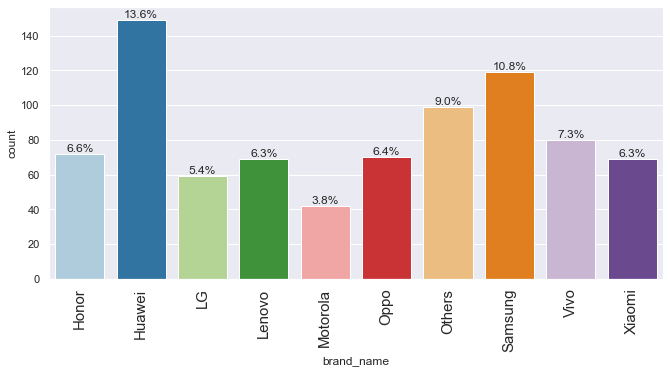

<IPython.core.display.Javascript object>

In [21]:
# Top 10 brands of phones and tablets with a screen size larger than 6 inches
labeled_barplot(df_screen, "brand_name", perc=True, n=10)

**Observations:** The brand that offers more devices with a screen of 6 inches or more is Huawei. There are 149 Huawei's devices (13.6% of the total). Huawei is follow by Samsun with 10.8% of the devices with screens bigger than 6 inch. The brand with less of these devices is Microsoft, with only one.

#### 6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?

To analyze budget devices, we need first to devide them in different groups according to their price. We have two different price available in our dataset.  Used price presents a problem in this case because we can have equal devices with differnt prices. Devices from the same brand and model (althugh we don't know the models in this case) and same features will have different prices depending on the days they've been used. Since the objective is to compare de devices accross different brands we will use new price.

In [22]:
# df1 is a new dataframe that will store the original dataset plus additional columns
df1 = df.copy()

<IPython.core.display.Javascript object>

In [23]:
# Crating a new feature to organize the devices in different price categories.
df1["new_price_bin"] = pd.cut(
    df1["new_price"], [-np.inf, 200, 300, np.inf], labels=["Low", "Middle", "High"]
)
df_selfie = df1[df1.selfie_camera_mp > 8]
print(
    f"There are {df_selfie.shape[0]} budget devices -which cost less than 200euros- offering greater than 8MP selfie cameras"
)

There are 655 budget devices -which cost less than 200euros- offering greater than 8MP selfie cameras


<IPython.core.display.Javascript object>

In [24]:
# creating a dataframe with budget devices that offer a selfie camara> 8MP
x = df1.loc[df1["new_price_bin"] == "Low"]
x = x.loc[x["selfie_camera_mp"] > 8]

<IPython.core.display.Javascript object>

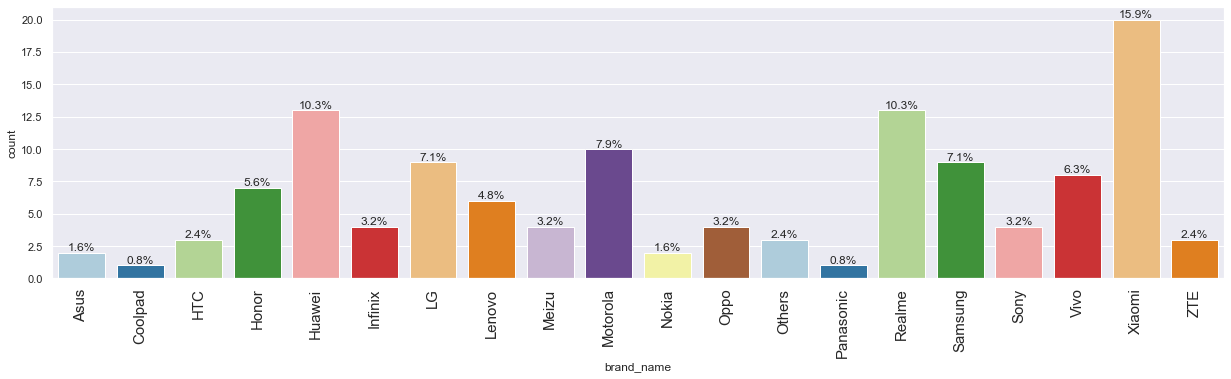

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(x, "brand_name", perc=True)

**Observations:** Xiaomi is the brand that offers more budget devices with a selfie camera of 8MP or more. It's follow by Huawei and Realme, and Motorola is in the 4th place.

#### 7. Which attributes are highly correlated with the price of a used device?

In [26]:
df_corr = df.corr()
df_corr[["used_price"]]

,used_price
screen_size,0.529275
main_camera_mp,0.459209
selfie_camera_mp,0.614675
int_memory,0.378347
ram,0.529434
battery,0.549647
weight,0.357983
release_year,0.494910
days_used,-0.385777
new_price,0.809335


<IPython.core.display.Javascript object>

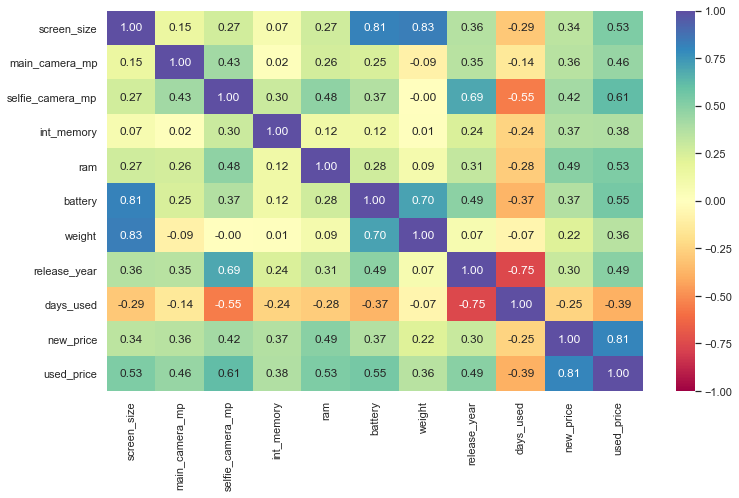

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations:** The two attributes that persent a higher correlation with the price of used devices are `new_price` and `selfie_camera_mp`. As we can anticipate, the only attribute that has a negative correlation with `used_price` is `days_used`.

#### Univariate Analysis (variables haven't been individually analyzed in the previous questions)

#### New devices price

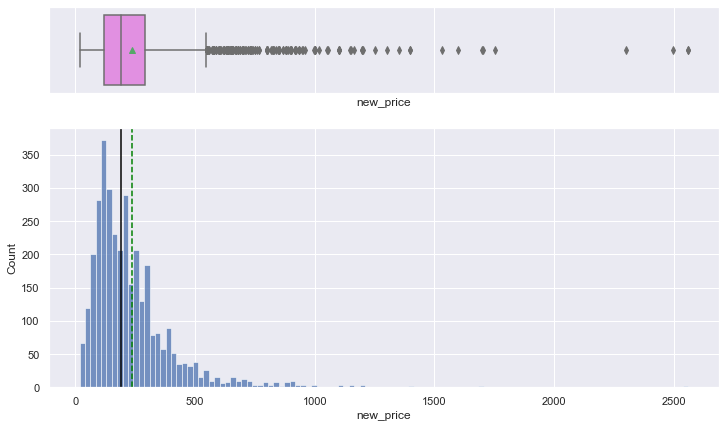

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(df, "new_price")

**Observations:** The shape of the distribution looks similar to `used_price` distribution, but the prices are higher (which makes sense because these are new devices). There are many outliers on the right side of the distribution, including some devices that cost more than 2500 euros. Most of the outliers though are close to the maximum right after the end of the right whisker.

#### Days used

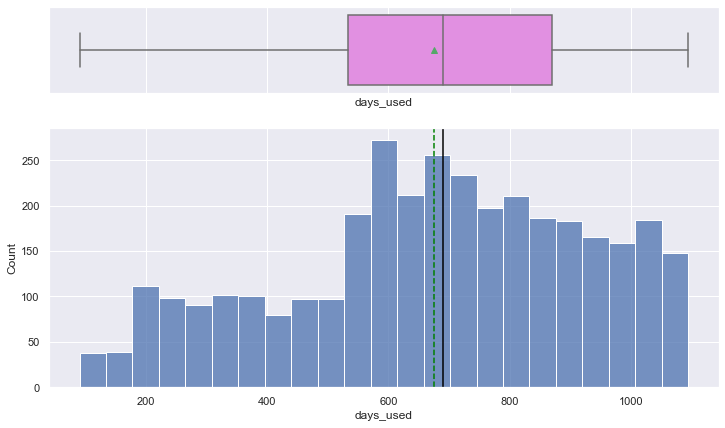

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(df, "days_used")

**Observations:** Although this is not a normal distribution, we can see that the mean and the median are close, and there are no outliers. The distribution is left skewed, and the mode is on the left too. ~600 days of use presents the largest count. We can also see there is no tail on the right. This might be explained by the fact that it makes no sense to sell a phone that is too old (at least in this market).

#### Weight

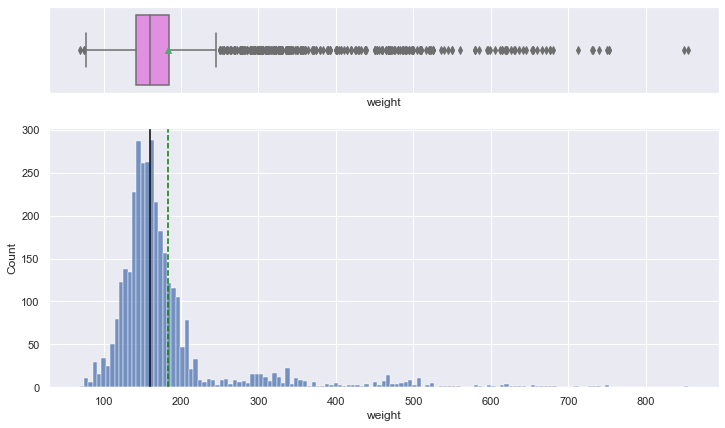

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(df, "weight")

**Observations:** 
* The shape of distribution of `weight` looks pretty normal but with a large right tale. As the distribution is positively skewed, the mean is on the right side of the median.
* The values under the normal curve go from about 50 grams to 250 grams. There are many outliers after 250 grams, some of them also over 800 grams. There are a few outliers on the left too, as we can observe at the boxplot.

#### Battery

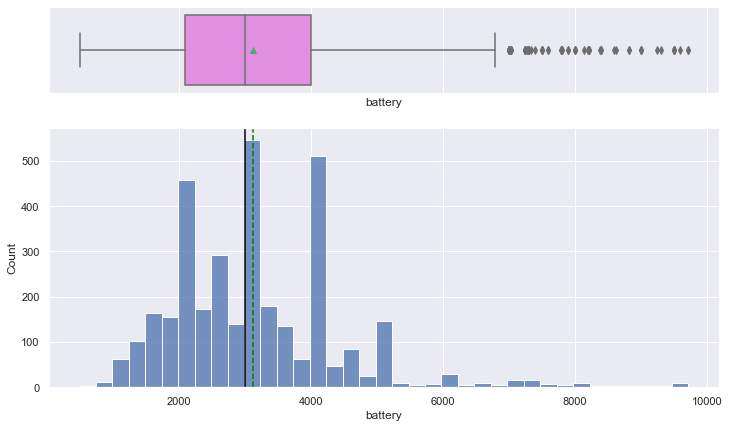

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(df, "battery")

#### Ram

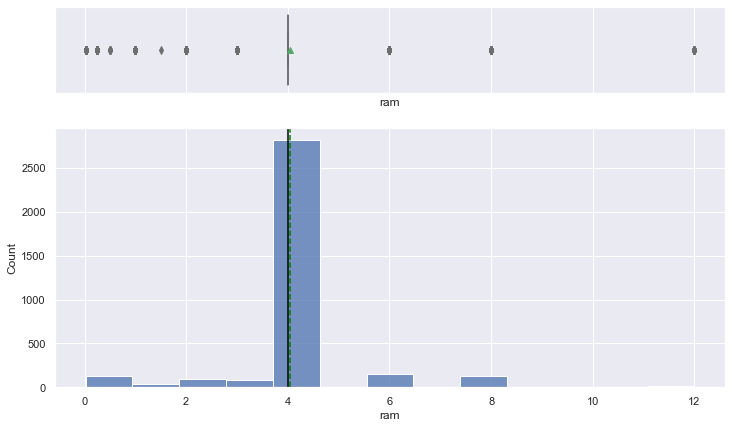

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(df, "ram")

**Observations:** Since `ram` is a discrete ordinal variable in nature the histogram doesn't seem to be a good way to visualize its distribution. We'll check out the count of unique values and then use a barplot.

In [33]:
df.ram.value_counts()

4.00     2815
6.00      154
8.00      130
2.00       90
0.25       83
3.00       81
1.00       34
12.00      18
0.02       18
0.03       17
0.50        9
1.50        1
Name: ram, dtype: int64

<IPython.core.display.Javascript object>

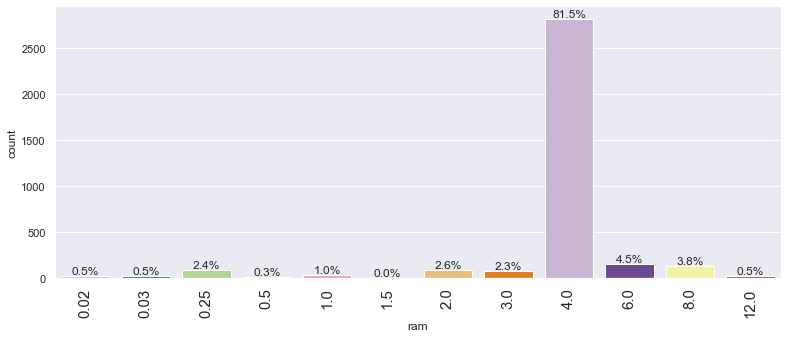

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(df, "ram", perc=True)

**Observations:** The vast majority of the devices, 81.5%, have 4GB of RAM memory.

#### Internal Memory

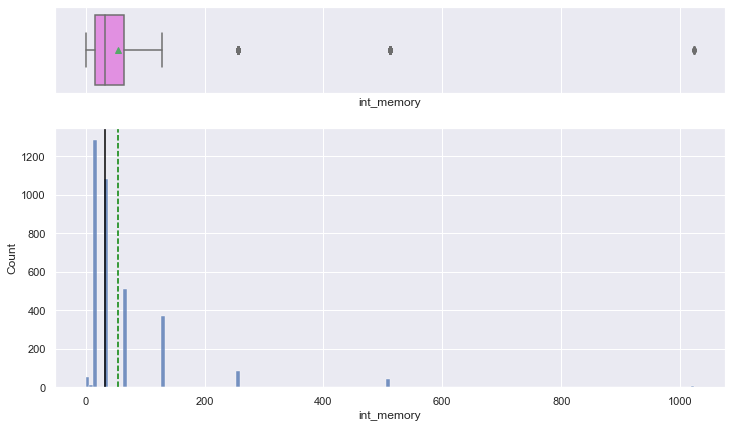

<IPython.core.display.Javascript object>

In [35]:
histogram_boxplot(df, "int_memory")

**Observations:** Again, an histogram doesn't provide a good visualization.

In [36]:
# Checking the number of unique values.
# It's 16, a bit high to do a bar plot, but still makes sense to visualize the count.
df.int_memory.unique().shape[0]

16

<IPython.core.display.Javascript object>

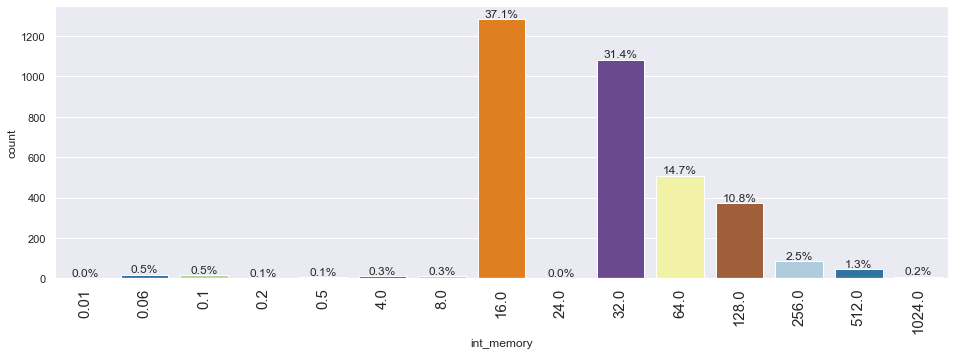

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(df, "int_memory", perc=True)

**Observations:** 37% of the devices have 16 GB internal memory, follow by 31% with 32 GB, 14.7% with 64 GB, and 10.8% with 128 GB.

#### Selfie Camera megapixeles

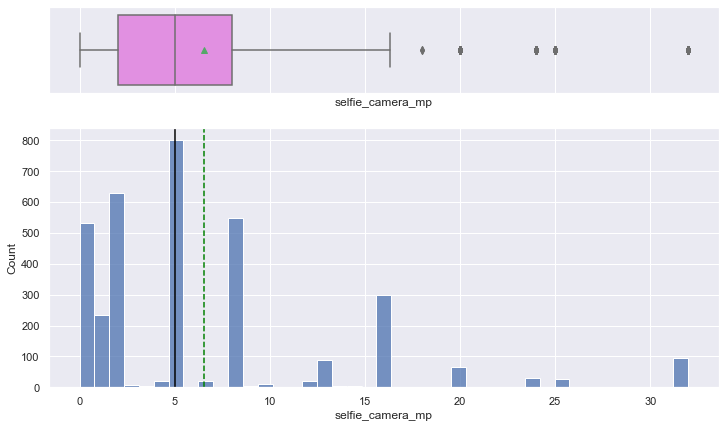

<IPython.core.display.Javascript object>

In [38]:
histogram_boxplot(df, "selfie_camera_mp")

In [39]:
# Checking the number of unique values. It's too hight, therefore we'll visualize only the top 10.
df.selfie_camera_mp.unique().shape[0]

38

<IPython.core.display.Javascript object>

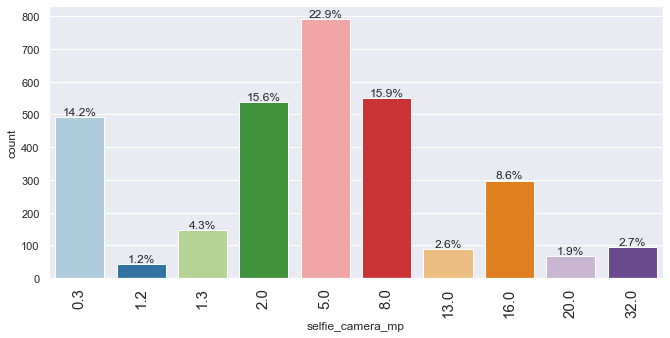

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(df, "selfie_camera_mp", perc=True, n=10)

**Observations:** 22.9% of the devices have a selfie camera of 5 MP. There is a 15% with 8 MP, and another 15% with 2 MP. Another 14% have selfie cameras of 0.3 MP. None of the other MP values represents, individually, more than 10% of the devices.

#### Main Camera megapixeles

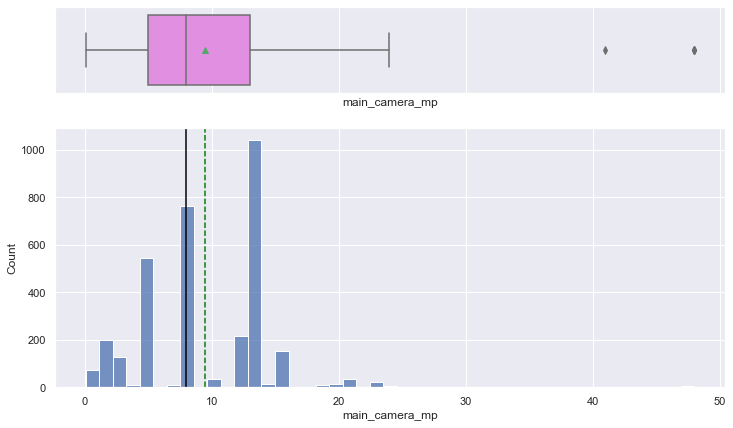

<IPython.core.display.Javascript object>

In [41]:
histogram_boxplot(df, "main_camera_mp")

In [42]:
# Checking the number of unique values. It's too hight, therefore we'll visualize only the top 10.
df.main_camera_mp.unique().shape[0]

42

<IPython.core.display.Javascript object>

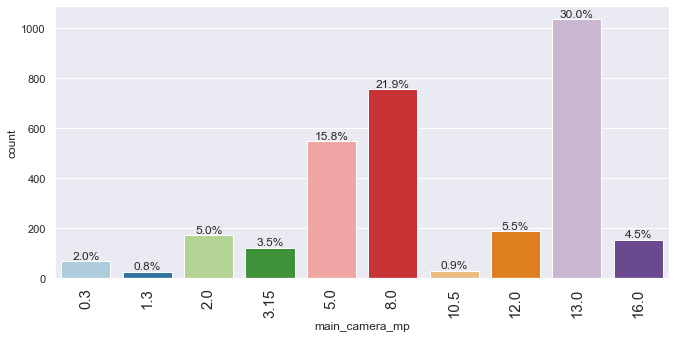

<IPython.core.display.Javascript object>

In [43]:
labeled_barplot(df, "main_camera_mp", perc=True, n=10)

**Observations:** 30% of the devices have a main camera of 13 MP, follow by devices with 8PM cameras (almost 22%), and 5 MP (15.8%). These three value 13MP, 8MP and 5MP, add up to more than 50% of the total devices.

#### Screen Size (in centimeters)

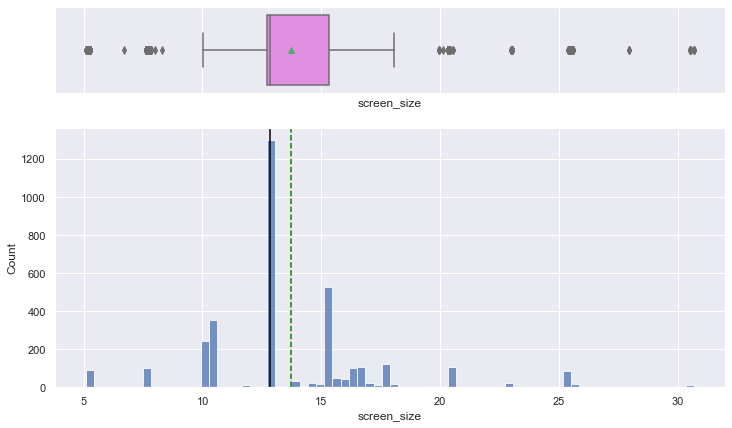

<IPython.core.display.Javascript object>

In [44]:
histogram_boxplot(df, "screen_size")

In [45]:
# Checking the number of unique values. It's too hight, therefore we'll visualize only the top 10.
df.screen_size.unique().shape[0]

142

<IPython.core.display.Javascript object>

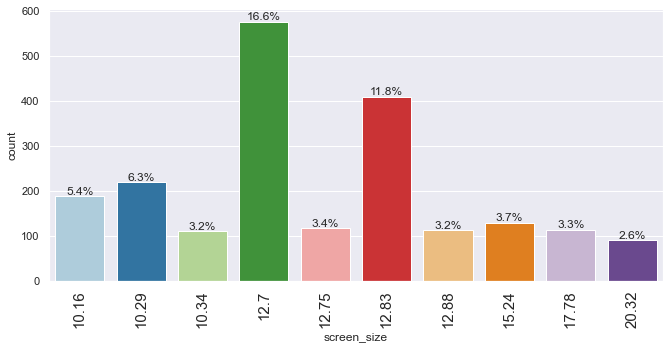

<IPython.core.display.Javascript object>

In [46]:
labeled_barplot(df, "screen_size", perc=True, n=10)

**Observations:** Almost 17% of the devices have a 12.7 centimeters size screen, follow by devices with 12.83 cm size screen (almost 12%), and 10.16 cm and 10.29 cm (6.3% and 5.4% respectively).

#### Brand Name

In [47]:
df.brand_name.unique().shape[0]

34

<IPython.core.display.Javascript object>

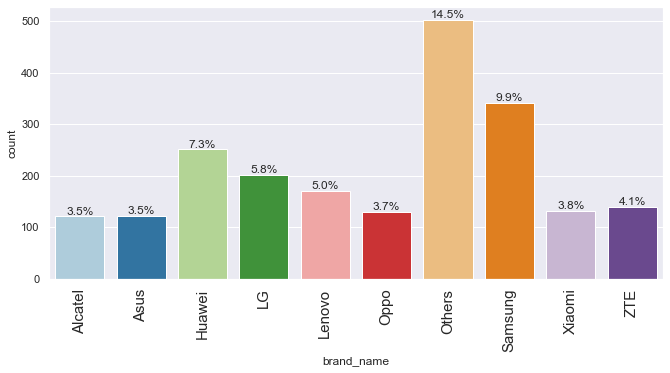

<IPython.core.display.Javascript object>

In [48]:
# Top 10 Brands
labeled_barplot(df, "brand_name", perc=True, n=10)

**Observations:** The top 3 brands in the dataset are Samsung (9.9%), Huawei (7.3%), and LG (5.8%). But the category that has the highest value count (14% of the total) is 'Others'.

#### Release Year

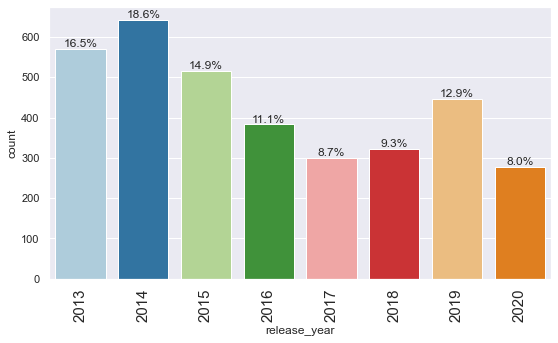

<IPython.core.display.Javascript object>

In [49]:
labeled_barplot(df, "release_year", perc=True)

**Observations:** Exactly half of the dataset is formed by devices released on 2013 (16.5%), 2014 (18.6%), and 2015 (14.9%). Newer devices, from 2016 to 2020, represent the other half.

#### 4 G

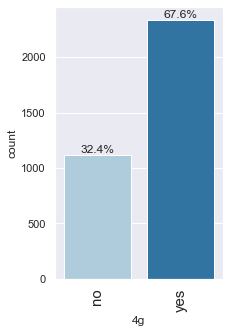

<IPython.core.display.Javascript object>

In [50]:
labeled_barplot(df, "4g", perc=True)

**Observations:** 67.6% of the devices have 4G.

#### 5 G

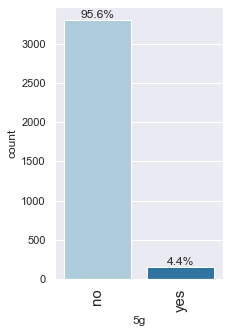

<IPython.core.display.Javascript object>

In [51]:
labeled_barplot(df, "5g", perc=True)

**Observations:** Only 4.4% of the devices have 5G.

## Data Preprocessing

### Missing values treatment

In [52]:
df1.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
new_price_bin         0
dtype: int64

<IPython.core.display.Javascript object>

In [53]:
# Checking if there is a pattern in the missing values.
num_missing = df1.isnull().sum(axis=1)
num_missing.value_counts()

0    3253
1     200
2       1
dtype: int64

<IPython.core.display.Javascript object>

In [54]:
df1[num_missing == 2]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,new_price_bin
2059,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,NaN,82.6,2016,1023,38.78,15.88,Low


<IPython.core.display.Javascript object>

**Observation:** Almost all of the rows with missing values have only one value missing. There is only one row with two missing values (ram and battery).

#### Missing values: Battery and Weight

In [55]:
df1.battery_size = 0
for item in df1.notnull().index:
    if df1.loc[item, "battery"] > 6000:
        df1.loc[item, "battery_size"] = "more_than_6000mAh"
    elif df1.loc[item, "battery"] > 4000:
        df1.loc[item, "battery_size"] = "4000_to_6000mAh"
    elif df1.loc[item, "battery"] > 2000:
        df1.loc[item, "battery_size"] = "2000_to_4000mAh"
    elif df1.loc[item, "battery"] <= 2000:
        df1.loc[item, "battery_size"] = "less_than_2000"
    else:
        df1.loc[item, "battery_size"] = "Missing"

<IPython.core.display.Javascript object>

In [56]:
# Checking if all NaNs in weight match with a battery_size category that is not 'Missing'.
# To make sure using groupby 'battery_size' is an accurate option to imput missing 'weight' values
df1.loc[df1["weight"].isnull()]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,new_price_bin,battery_size
3002,XOLO,Android,12.70,yes,no,13.0,5.0,32.0,4.0,2400.0,NaN,2015,576,138.44,64.45,Low,2000_to_4000mAh
3003,XOLO,Android,12.83,yes,no,8.0,5.0,16.0,4.0,3200.0,NaN,2015,800,179.33,72.39,Low,2000_to_4000mAh
3004,XOLO,Android,12.70,no,no,8.0,2.0,32.0,4.0,2100.0,NaN,2015,878,59.21,48.41,Low,2000_to_4000mAh
3005,XOLO,Android,10.29,no,no,5.0,0.3,32.0,4.0,1800.0,NaN,2015,1036,81.13,45.78,Low,less_than_2000
3006,XOLO,Android,12.70,no,no,5.0,0.3,16.0,4.0,2500.0,NaN,2015,679,77.26,46.39,Low,2000_to_4000mAh
3007,XOLO,Windows,12.70,no,no,8.0,2.0,32.0,4.0,2200.0,NaN,2015,838,120.51,40.74,Low,2000_to_4000mAh
3008,XOLO,Android,12.70,no,no,8.0,5.0,32.0,4.0,2500.0,NaN,2015,1045,119.75,65.67,Low,2000_to_4000mAh


<IPython.core.display.Javascript object>

We will use the mean weight grouped by the feature `battery_size` to impute missing `weight` values.
The distribution is devided in four different weight ranges, and we'll imput the mean of the segment. We know `weight` is right skewed but extreme values are grouped together, therefore the mean is still an accurate representation of each range. 

In [57]:
df1[["weight"]] = df1.groupby("battery_size")[["weight"]].transform(
    lambda x: x.fillna(round(x.mean(), 1))
)
df1.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                0
release_year          0
days_used             0
new_price             0
used_price            0
new_price_bin         0
battery_size          0
dtype: int64

<IPython.core.display.Javascript object>

Now to impute missing `battery` values we will group the devices by `weight`.

In [58]:
# statistic summary of weight.
df1["weight"].describe()

count    3454.000000
mean      182.717284
std        88.328564
min        69.000000
25%       142.000000
50%       160.000000
75%       185.000000
max       855.000000
Name: weight, dtype: float64

<IPython.core.display.Javascript object>

In [59]:
df1["weight_bin"] = pd.cut(
    df1["weight"], [-np.inf, 142, 185, np.inf], labels=["Light", "Regular", "Heavy"]
)

<IPython.core.display.Javascript object>

In [60]:
df1[["battery"]] = df1.groupby("weight_bin")[["battery"]].transform(
    lambda x: x.fillna(round(x.median(), 1))
)
df1.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               0
weight                0
release_year          0
days_used             0
new_price             0
used_price            0
new_price_bin         0
battery_size          0
weight_bin            0
dtype: int64

<IPython.core.display.Javascript object>

#### Missing values: Internal Memory, Ram, Selfie Camera, Main Camera

For the rest missing values in `ram`, `int_memory`, `selfie_camera_mp` and `main_camera_mp` we will group the devices by `new_price_bin`, `brand_name`, and `release_year`. This way we know the values we imput will be a fair representation of devices within a similar price range, manufactured by the same brand, and release the same year.
In these cases we will impute the median value since, as we observed in the EDA, these variable are descrete. 

In [61]:
df1[["ram", "int_memory", "selfie_camera_mp", "main_camera_mp"]] = df1.groupby(
    ["new_price_bin", "brand_name", "release_year"]
)[["ram", "int_memory", "selfie_camera_mp", "main_camera_mp"]].transform(
    lambda x: x.fillna(x.median())
)

df1.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            0
ram                   0
battery               0
weight                0
release_year          0
days_used             0
new_price             0
used_price            0
new_price_bin         0
battery_size          0
weight_bin            0
dtype: int64

<IPython.core.display.Javascript object>

There are still missing values, we will group them by `new_price_bin` and `brand_name`.

In [62]:
df1[["selfie_camera_mp", "main_camera_mp"]] = df1.groupby(
    ["new_price_bin", "brand_name"]
)[["selfie_camera_mp", "main_camera_mp"]].transform(lambda x: x.fillna(x.median()))

df1.isnull().sum()

brand_name           0
os                   0
screen_size          0
4g                   0
5g                   0
main_camera_mp      16
selfie_camera_mp     0
int_memory           0
ram                  0
battery              0
weight               0
release_year         0
days_used            0
new_price            0
used_price           0
new_price_bin        0
battery_size         0
weight_bin           0
dtype: int64

<IPython.core.display.Javascript object>

For the remaining missing values, we are just going to impute the median value without groupping it.

In [63]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())
df1.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
new_price_bin       0
battery_size        0
weight_bin          0
dtype: int64

<IPython.core.display.Javascript object>

**Observations:** There are no more missing values in our dataset.

### Outliers detection and treatment

In [64]:
# We'll use df2 to store any transformation we do to the variables.
df2 = df1.copy()

<IPython.core.display.Javascript object>

#### Numeric column distribution

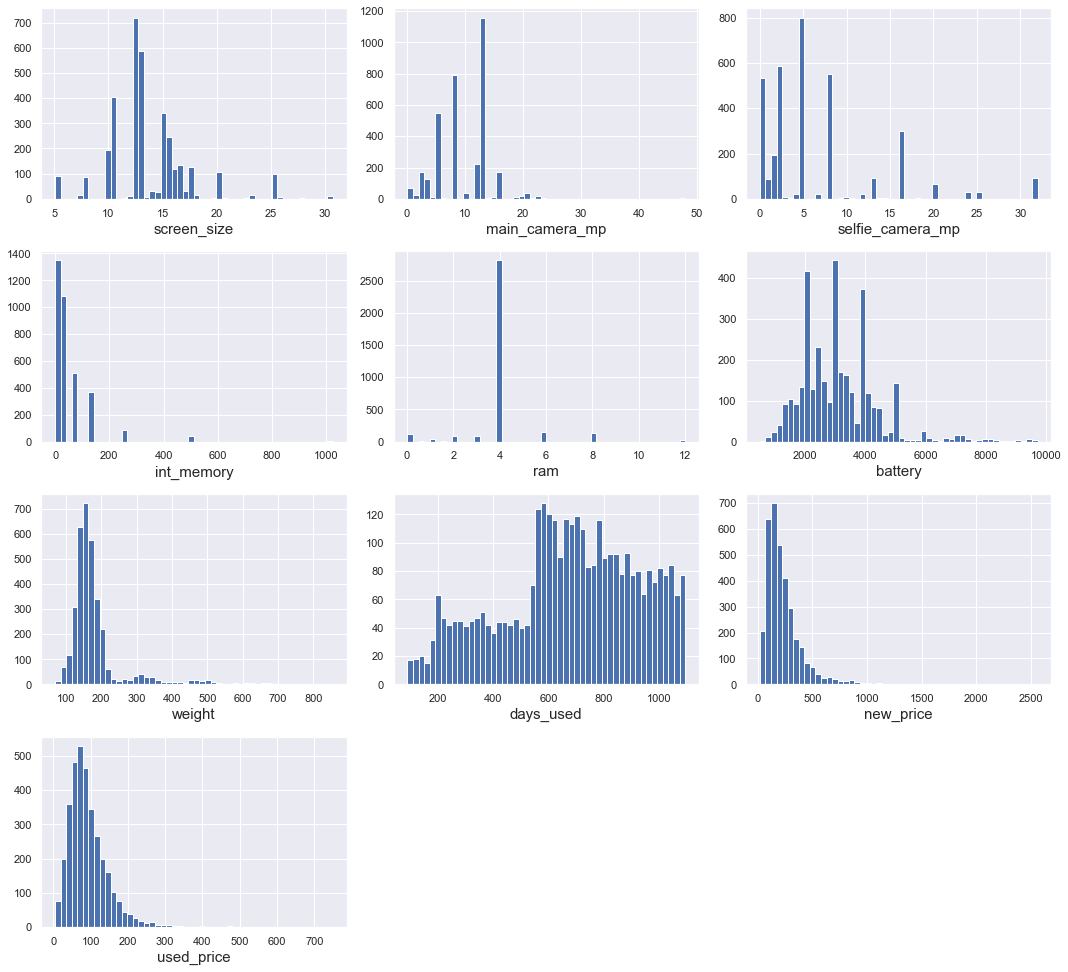

<IPython.core.display.Javascript object>

In [65]:
# creating a list of numeric columns
dist_cols = [item for item in df2.select_dtypes(include=np.number)]

# dropping release_year since it's a time variable
dist_cols.remove("release_year")

# Ploting a histogram of all numeric columns
plt.figure(figsize=(15, 30))

for i in range(len(dist_cols)):
    plt.subplot(9, 3, i + 1)
    plt.hist(df2[dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.xlabel(dist_cols[i], fontsize=15)

plt.show()

**Observations:** 
* `battery` is right skewed, with three values which count is way higher than the others. Also the values go from ~100 to ~10000. I'll apply a scale transformation to reduce the scale and see if it's possible to improve the shape of the distribution, although it won't reduce the skeweness.
* `new_price`, and `used_price` are right skewed. They have a bell shape but with a long right tale. I'll apply a log transformation to help reduce the skeweness.

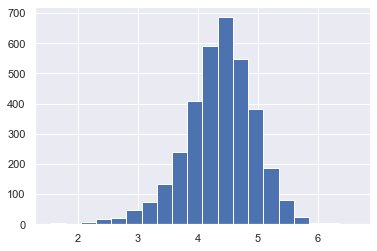

<IPython.core.display.Javascript object>

In [66]:
# used_price log transformation
df2["used_price_log"] = np.log(df2["used_price"])
df2["used_price_log"].hist(bins=20)
plt.show()

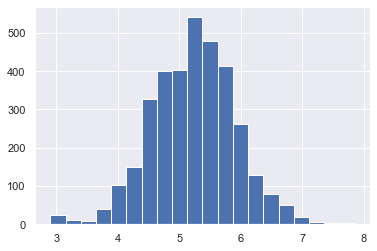

<IPython.core.display.Javascript object>

In [67]:
# new_price log transformation
df2["new_price_log"] = np.log(df2["new_price"])
df2["new_price_log"].hist(bins=20)
plt.show()

In [68]:
from sklearn.preprocessing import MinMaxScaler

<IPython.core.display.Javascript object>

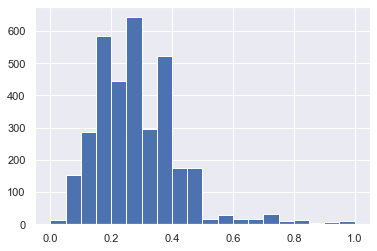

<IPython.core.display.Javascript object>

In [69]:
# battery scale transformation
df2["battery_scale"] = MinMaxScaler().fit_transform(df2[["battery"]])
df2["battery_scale"].hist(bins=20)
plt.show()

#### Checking outliers

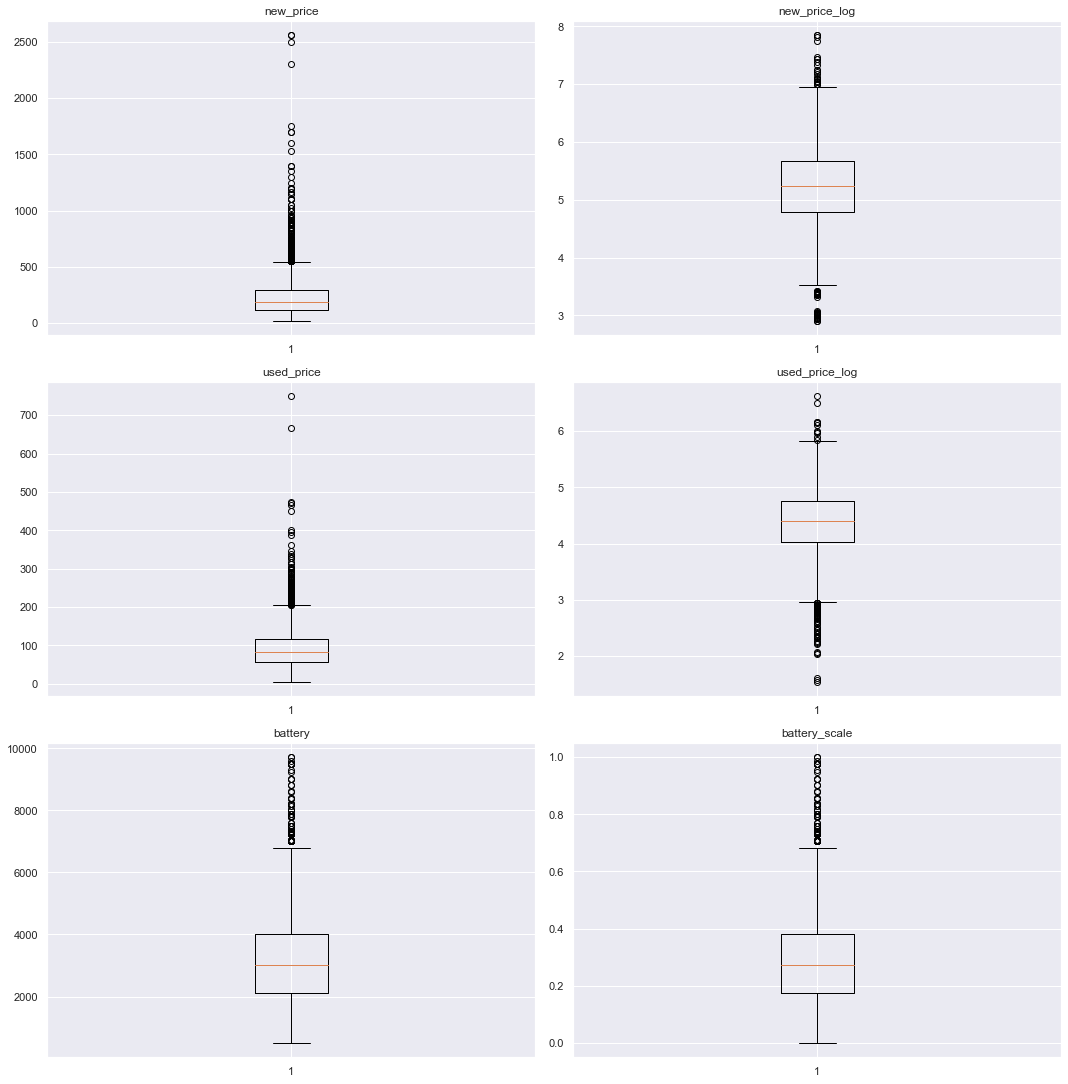

<IPython.core.display.Javascript object>

In [70]:
# Creating a list of the numeric columns that have been transformed.
# I'll keep original and transformed variables to see how the transformation affects them.
out_trans_cols = df2[
    [
        "new_price",
        "new_price_log",
        "used_price",
        "used_price_log",
        "battery",
        "battery_scale",
    ]
]

plt.figure(figsize=(15, 35))

for i, variable in enumerate(out_trans_cols):
    plt.subplot(7, 2, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:** the variables with a log transformatio still present outliers but the distribution is closer to the center. In the case of the scale transformation, it didn't treat the outliers but make the scale more comparable to the other variables

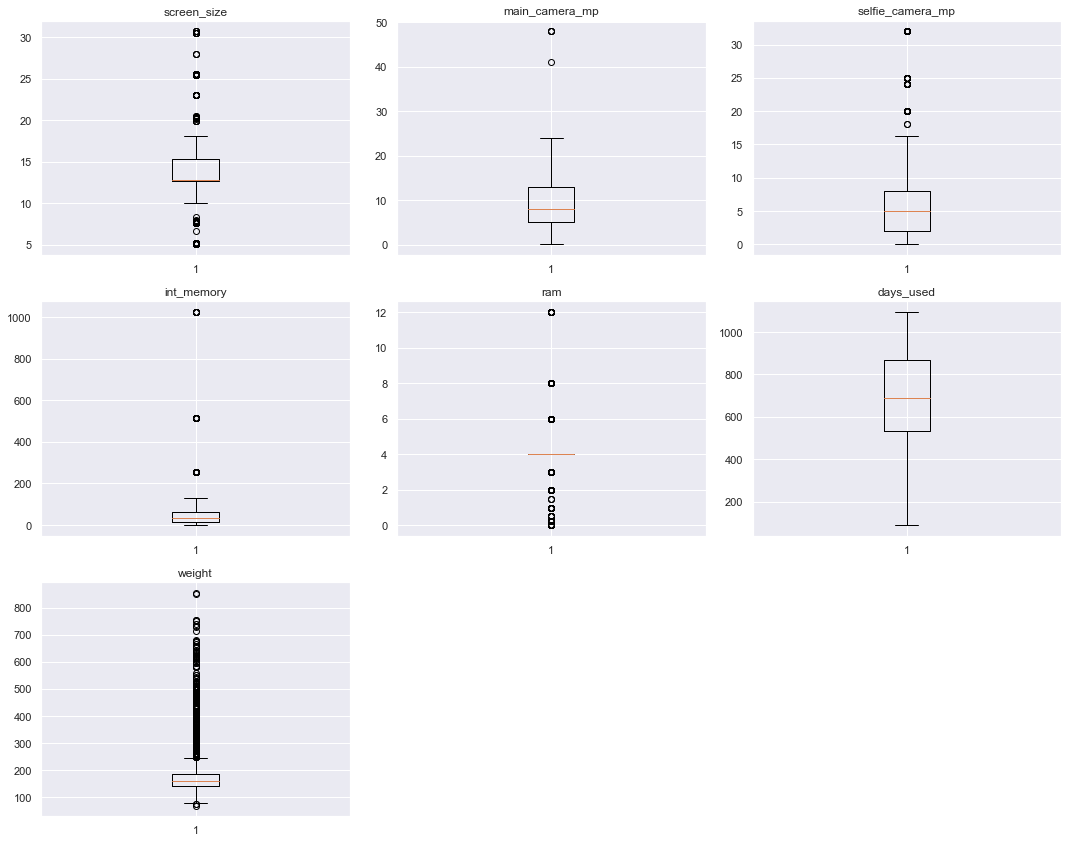

<IPython.core.display.Javascript object>

In [71]:
# Creating a list of the numerica columns not included in the previous plot.
out_cols = df2[
    [
        "screen_size",
        "main_camera_mp",
        "selfie_camera_mp",
        "int_memory",
        "ram",
        "days_used",
        "weight",
    ]
]

plt.figure(figsize=(15, 35))

for i, variable in enumerate(out_cols):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:** Although these variables present some outliers (except from days_used) we won't treat them.

## EDA

- It is a good idea to explore the data once again after manipulating it.

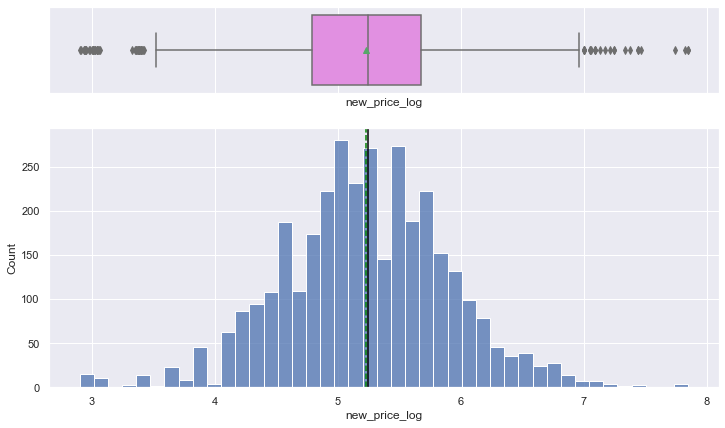

<IPython.core.display.Javascript object>

In [72]:
histogram_boxplot(df2, "new_price_log")

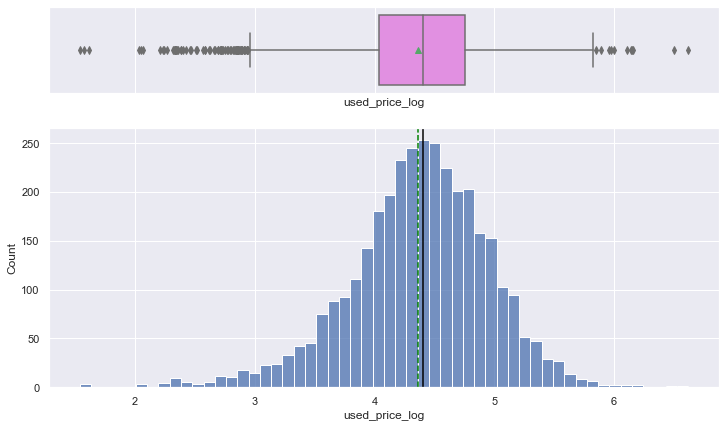

<IPython.core.display.Javascript object>

In [73]:
histogram_boxplot(df2, "used_price_log")

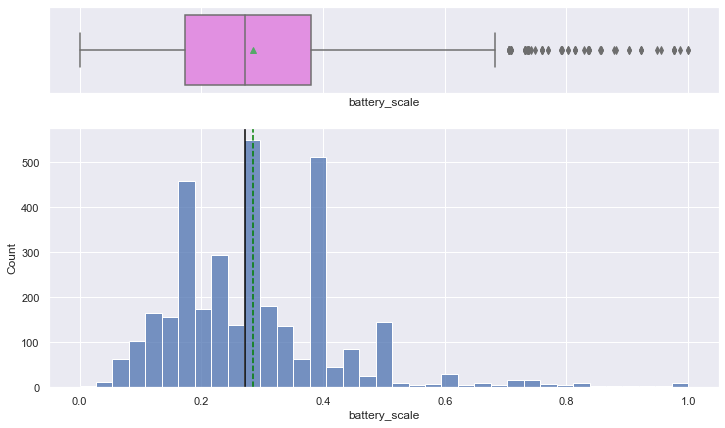

<IPython.core.display.Javascript object>

In [74]:
histogram_boxplot(df2, "battery_scale")

**Observations:** The log transformatio helped to improve the distribution, moving the bell shape closer to the center of it. In the case of the scale transformation, it didn't treat the outliers but make the scale more comparable to the other variables

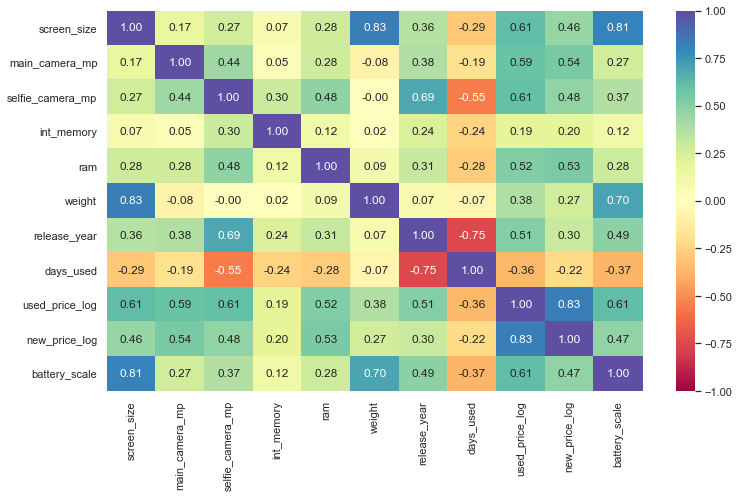

<IPython.core.display.Javascript object>

In [75]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df2.drop(["used_price", "new_price", "battery"], axis=1).corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

**Observations:** `used_price_log` (our target variable) is highly correlated with `new_price_log`, `screen_size`, `selfie_camera` and `battery_scale`

## Building a Linear Regression model

In [76]:
df3 = df2.copy()

<IPython.core.display.Javascript object>

In [77]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3454 non-null   object  
 1   os                3454 non-null   object  
 2   screen_size       3454 non-null   float64 
 3   4g                3454 non-null   object  
 4   5g                3454 non-null   object  
 5   main_camera_mp    3454 non-null   float64 
 6   selfie_camera_mp  3454 non-null   float64 
 7   int_memory        3454 non-null   float64 
 8   ram               3454 non-null   float64 
 9   battery           3454 non-null   float64 
 10  weight            3454 non-null   float64 
 11  release_year      3454 non-null   int64   
 12  days_used         3454 non-null   int64   
 13  new_price         3454 non-null   float64 
 14  used_price        3454 non-null   float64 
 15  new_price_bin     3454 non-null   category
 16  battery_size      3454 n

<IPython.core.display.Javascript object>

In [78]:
# we'll drop from df3 the variables we won't use to fit the model.
df3.drop(
    [
        "used_price",
        "new_price",
        "battery",
        "new_price_bin",
        "battery_size",
        "weight_bin",
    ],
    axis=1,
    inplace=True,
)

<IPython.core.display.Javascript object>

In [81]:
df3.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'weight', 'release_year',
       'days_used', 'used_price_log', 'new_price_log', 'battery_scale'],
      dtype='object')

<IPython.core.display.Javascript object>

In [82]:
# Defining dependent and independent variable
X = df3.drop(["used_price_log"], axis=1)
y = df3["used_price_log"]

<IPython.core.display.Javascript object>

In [83]:
# Adding the intercept to data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [84]:
# creating dummy variables

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# to ensure all variables are of float type
X = X.astype(float)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,weight,release_year,days_used,new_price_log,battery_scale,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,146.0,2020.0,127.0,4.715100,0.273319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,213.0,2020.0,325.0,5.519018,0.412148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,213.0,2020.0,162.0,5.884631,0.401302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,25.50,13.0,8.0,64.0,6.0,480.0,2020.0,345.0,5.630961,0.732104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,185.0,2020.0,293.0,4.947837,0.488069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<IPython.core.display.Javascript object>

In [85]:
# splitting the data in 70:30 ratio for train to test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])


Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

In [86]:
# fitting a linear model
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     268.6
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:16:14   Log-Likelihood:                 123.56
No. Observations:                2417   AIC:                            -149.1
Df Residuals:                    2368   BIC:                             134.6
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -45.61

<IPython.core.display.Javascript object>

## Model performance evaluation

In [91]:
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"RMSE": rmse, "MAE": mae, "MAPE": mape, "R-squared": r2, "Adj-R2": adjr2},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [92]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,MAPE,R-squared,Adj-R2
0,25.099647,16.523475,18.868726,0.795235,0.790996


<IPython.core.display.Javascript object>

In [93]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,MAPE,R-squared,Adj-R2
0,24.211204,16.54761,19.402764,0.79008,0.779658


<IPython.core.display.Javascript object>

**Observations**

* After reversing the transformations, the train and test $R^2$ are 0.795 and 0.79, indicating that the model explains 79.5% and 79% of the total variation in the train and test sets respectively. Also, both scores are comparable.

* RMSE values on the train and test sets are also comparable. This shows that the model is not overfitting.

* MAE indicates that our current model is able to predict the price of used devices within a mean error of 16 euros on the test set.

* MAPE of 19 on the test data means that we are able to predict the price of used devices within 19% of used device prices.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

**The Linear Regression Assumptions are:**

1. No Multicollinearity

2. Linearity of variables

3. Independence of error terms

4. Normality of error terms

5. No Heteroscedasticity

### Test for Multicolinearity -VIF

* We'll use the the Variance Inflation Factor, or VIF, to detect multicolinearity. The predictors multicolinearity will be checked based on the following criteria:

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [95]:
checking_vif(X_train)

,feature,VIF
0,const,3.794800e+06
1,screen_size,7.682457e+00
2,main_camera_mp,2.305174e+00
3,selfie_camera_mp,2.811170e+00
4,int_memory,1.362919e+00
5,ram,2.284282e+00
6,weight,6.422563e+00
7,release_year,4.902324e+00
8,days_used,2.659276e+00
9,new_price_log,3.127641e+00


<IPython.core.display.Javascript object>

**Observations:**
* `screen_size`, `weight`, `brand_name_Huawei`, `brand_name_Others`, `brand_name_Samsung` present a moderate multicolinearity.
* From our EDA we know that `screen_size` and `weight` are correlated. We'll check in the next step which predictor we'll drop.
*  `brand_name_Huawei`, `brand_name_Others`, `brand_name_Samsung` are dummy variables.

In [96]:
# We'll create a function to check the effect of dropping the columns with high multicollinearity.


def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [97]:
col_list = [
    "weight",
    "screen_size",
    "brand_name_Huawei",
    "brand_name_Others",
    "brand_name_Samsung",
]

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Huawei,0.841770,0.232229
1,brand_name_Others,0.841768,0.232231
2,brand_name_Samsung,0.841736,0.232255
3,screen_size,0.838390,0.234697
4,weight,0.838015,0.234968


<IPython.core.display.Javascript object>

* Dropping `weight` would have the maximum negative impact on the predictive power of the model (amongst the variables being considered).
* We'll drop `screen_size` and check the VIF again.

In [98]:
col_to_drop = "screen_size"
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,3.669601e+06
1,main_camera_mp,2.301615e+00
2,selfie_camera_mp,2.807744e+00
3,int_memory,1.360808e+00
4,ram,2.284280e+00
5,weight,3.022039e+00
6,release_year,4.736171e+00
7,days_used,2.647554e+00
8,new_price_log,3.085839e+00
9,battery_scale,3.884282e+00


<IPython.core.display.Javascript object>

**Observations:**
* After dropping `screen_size` the VIF of `weight` is lower than 5. There is no more multicolinearity.
* `brand_name_Huawei`, `brand_name_Others`, `brand_name_Samsung`still have a VIF> 5. These are dummy variables, therefore we won't drop these two dummys unless we decide to get rid of all of them.

In [99]:
olsmodel2 = sm.OLS(y_train, X_train2).fit()
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     267.7
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:27:30   Log-Likelihood:                 98.014
No. Observations:                2417   AIC:                            -100.0
Df Residuals:                    2369   BIC:                             177.9
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -57.50

<IPython.core.display.Javascript object>

### Dropping Predictors with p-value>0.05

In [101]:
# Dropping predictors with p-value >0.05

# initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, X_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'release_year', 'new_price_log', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


<IPython.core.display.Javascript object>

In [102]:
X_train3 = X_train2[selected_features]
X_test3 = X_test2[selected_features]

<IPython.core.display.Javascript object>

In [103]:
olsmodel3 = sm.OLS(y_train, X_train3).fit()
print(olsmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     896.2
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:29:48   Log-Likelihood:                 81.242
No. Observations:                2417   AIC:                            -132.5
Df Residuals:                    2402   BIC:                            -45.63
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -56.6691      6

<IPython.core.display.Javascript object>

**Observations:** All the predictors in the model are statistically sifnificant to predict the price of used devices. All the p-values are lower than 0.05.

### Test for Linearity and Independence

In [104]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel3.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.866452,0.221035
1525,4.448399,4.602100,-0.153700
1128,4.315353,4.285860,0.029492
3003,4.282068,4.269788,0.012280
2907,4.456438,4.491216,-0.034778


<IPython.core.display.Javascript object>

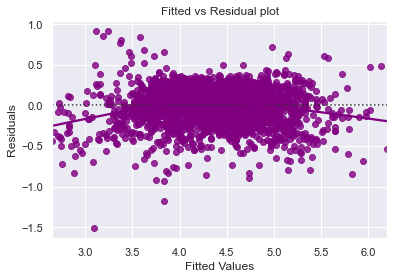

<IPython.core.display.Javascript object>

In [105]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations:**
* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).
* There is no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

### Checking Normality of error terms

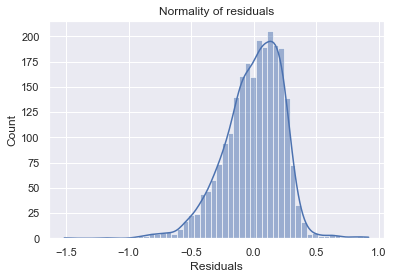

<IPython.core.display.Javascript object>

In [106]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

**Observations:** 
* The histogram of residuals have a bell shape (with a bit long left tale), showing the error terms are normally distributed,.
* We'll also check the normality using a Q-Q plot.

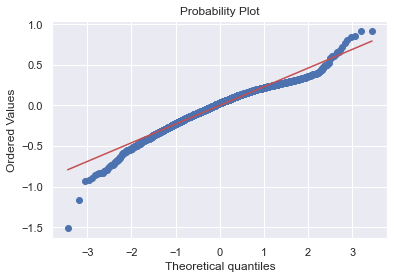

<IPython.core.display.Javascript object>

In [107]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Observations:** 
* The residuals more or less follow a straight line except for the tails.
* Now, we'll heck the results of the Shapiro-Wilk test.

In [108]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9680672287940979, pvalue=9.358600230902815e-23)

<IPython.core.display.Javascript object>

**Observations:**
* Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
* Although the residuals are not normally distributed, this often happens. We can try and do other transforamtions to the variables or accept the model as it is. 
* We'll accept this distribution as close to being normal, therefore the assumption is satified.

### Test for Homoscedasticity

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.




In [109]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train3)
lzip(name, test)

[('F statistic', 1.0047288055943868), ('p-value', 0.4675294541842674)]

<IPython.core.display.Javascript object>

**Observations:**  Since p-value > 0.05, the residuals are homoscedastic. So, this assumption is satisfied.

## Final Model Summary

### Actual and Predicted comparison
* Now that we've decided the model is ready, we can analyse it's perfomance comparing actual and predicted values. 

In [110]:
# predictions on the test set
pred = olsmodel3.predict(X_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.385819
2341,3.696103,4.003182
1913,3.592093,3.643648
688,4.306495,4.104278
650,4.522115,5.111699
2291,4.259294,4.398689
40,4.997685,5.458374
1884,3.875359,4.051894
2538,4.206631,4.034779
45,5.380450,5.227353


<IPython.core.display.Javascript object>

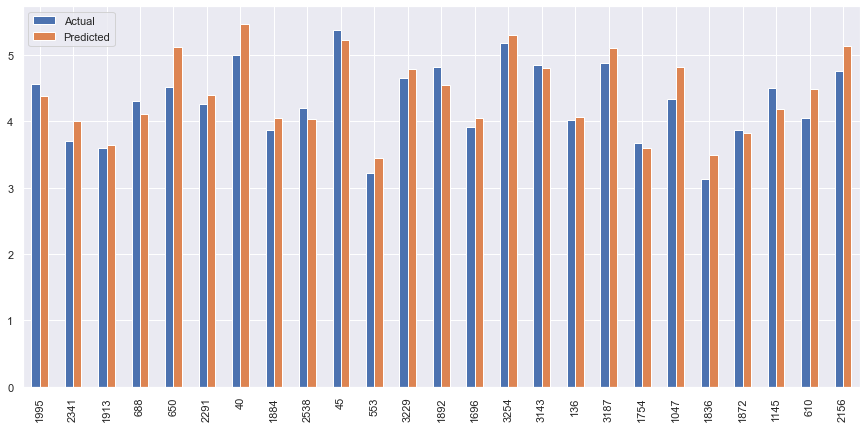

<IPython.core.display.Javascript object>

In [111]:
df_plot = df_pred_test.sample(25, random_state=1)
df_plot.plot(kind="bar", figsize=(15, 7))
plt.show()

**Observations:** As we can see both in the chart and the graph, the actual and predicted values are comparable. Then the model perfomance is good.

### Final model summary

In [112]:
print(olsmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     896.2
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        00:34:18   Log-Likelihood:                 81.242
No. Observations:                2417   AIC:                            -132.5
Df Residuals:                    2402   BIC:                            -45.63
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -56.6691      6

<IPython.core.display.Javascript object>

In [114]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf3 = model_performance_regression(olsmodel3, X_train3, y_train)
olsmodel_train_perf3

Training Performance



,RMSE,MAE,MAPE,R-squared,Adj-R2
0,26.029901,16.728343,19.177976,0.779775,0.778399


<IPython.core.display.Javascript object>

In [113]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf3 = model_performance_regression(olsmodel3, X_test3, y_test)
olsmodel_test_perf3

Test Performance



,RMSE,MAE,MAPE,R-squared,Adj-R2
0,24.47883,16.663245,19.640214,0.785413,0.782261


<IPython.core.display.Javascript object>

**Observations**
* After reversing the transformations, the train and test $R^2$ are 0.779 and 0.785, indicating that the model explains ~78% the total variation in both the train and test sets. Also, both scores are comparable.

* RMSE values on the train and test sets are also comparable. This shows that the model is not overfitting.

* MAE indicates that our current model is able to predict the price of used devices within a mean error of 16 euros on the test set.

* MAPE of 19 on the test data means that we are able to predict the price of used devices within 19% of used device prices.

## Actionable Insights and Recommendations

In [130]:
exp = {
    "main_cam": np.exp(0.0210),
    "selfie_cam": np.exp(0.0139),
    "ram": np.exp(0.0202),
    "weight": np.exp(0.0017),
    "release_year": np.exp(0.0288),
    "new_price": np.exp(np.exp(0.4404)),
    "Karbonn": np.exp(0.1154),
    "Samsung": np.exp(-0.0370),
    "Sony": np.exp(-0.0785),
    "Xiaomi": np.exp(0.0814),
}
exp

{'main_cam': 1.0212220516375285,
 'selfie_cam': 1.0139970541629217,
 'ram': 1.0204054007001484,
 'weight': 1.0017014458191815,
 'release_year': 1.029218730143355,
 'new_price': 4.727178087505437,
 'Karbonn': 1.12232227670881,
 'Samsung': 0.9636761353490535,
 'Sony': 0.9245020599315531,
 'Xiaomi': 1.0848047316866265}

<IPython.core.display.Javascript object>

* The features that have a signigicant impact in determing the cost of a used device are: `main_camera_mp`, `selfie_camara_mp`, `ram`, `weight`, `release_year`, `new_price` (we use a log transformation in this case), devices with `4g` and `5g`, and some specific brands. 
* For every unit increase of main camera (in megapixeles) the price of used devices will increase 
One unit increase of Screen Size (in cm's) leads to an increase of Used Price by exp(0.0423) = 1.04 Euros.
For the new_Price it'll be double exponent of the value exp(exp(0.4193)) = 4.58 Euros
